# Project 3 (Part 2) - Reddit Classification

<br/>
Option 1: Pipeline: CountVectorizer + MultinomialNB
<br/>
Option 2: Pipeline: CountVectorizer + Term frequency Inverse document frequency (TFIDF) +  MultinomialNB

# NTLP Model Prediction

In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

# Import CountVectorizer and TFIDFVectorizer from feature_extraction.text.
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Importing the data

In [2]:
#import the pokemon csv dataset
poke = pd.read_csv('pokemon.csv', low_memory=False)

In [3]:
#Select the columns of 'subreddit', 'selftext' and 'title' for a more detailed inspection
poke[['subreddit', 'title','selftext']].head()

,subreddit,title,selftext
0,pokemon,how does the day/night cycle work on the new g...,[removed]
1,pokemon,Is Espathra any good ? Stat and move pool wise?,[removed]
2,pokemon,Charcadet’s nature,[removed]
3,pokemon,"Toad's Daily Pokémon Ranking: Day 095, Onix",(Images are down to avoid spoilers for Scarlet...
4,pokemon,Is Esparthra any good?,[removed]


In [4]:
#import the pokemontrade csv dataset
poke_trade = pd.read_csv('pokemontrades.csv', low_memory=False)

In [5]:
#Select the columns of 'subreddit', 'selftext' and 'title' for a more detailed inspection
poke_trade[['subreddit','title', 'selftext']].head()

,subreddit,title,selftext
0,pokemontrades,LF: Male Larvitar FT: Male Sprigatito,NaN
1,pokemontrades,LF Sprigatito and Quaxly FT Fuecoco,I have 5 eggs of Fuecoco and can hatch them if...
2,pokemontrades,FT: Sprigatito eggs LF: Quaxly and Fuecoco,I have a bunch of Sprigatito eggs I can trade ...
3,pokemontrades,Can someone gift me a Fuecoco or Spigatito ple...,"I have nothing of value to trade, I just start..."
4,pokemontrades,LF: Any Foreign Ditto FT: Gible (premier ball)...,LF: Any Foreign Ditto \nFT: Gible (premier bal...


# Data Cleaning for pokemon subreddit

In [6]:
#Drop the NaN values for the pokemon['title'] subreddit
poke.dropna(subset=['title'],inplace=True)

In [7]:
#Drop the NaN values for the pokemon['selftext'] subreddit
poke.dropna(subset=['selftext'],inplace=True)

In [8]:
#Remove the 'removed' entries from the posts for the pokemon subreddit
poke.drop(poke[poke.selftext == '[removed]'].index, inplace=True)

In [9]:
poke.drop(poke[poke.selftext == '[deleted]'].index, inplace=True)

In [10]:
poke.drop(poke[poke.selftext.str.contains('moderator')].index, inplace=True)

In [11]:
poke.drop(poke[poke.selftext.str.contains('removed')].index, inplace=True)

In [12]:
poke.drop(poke[poke.selftext.str.contains("[]", regex=False)].index, inplace=True)

In [13]:
#Check the data shape after cleaning
poke.shape

(4703, 107)

In [14]:
#Check if there are still any missing columns
poke['title'].isna().sum()

0

In [15]:
#Check if there are still any missing columns
poke['selftext'].isna().sum()

0

# Data Cleaning for pokemontrade subreddit

In [16]:
#Drop the NaN values for the pokemon['title'] subreddit
poke_trade.dropna(subset=['title'],inplace=True)

In [17]:
#Drop the NaN values for the pokemon['selftext'] subreddit
poke_trade.dropna(subset=['selftext'],inplace=True)

In [18]:
#Remove the 'removed' entries from the posts for the pokemon subreddit
poke_trade.drop(poke_trade[poke_trade.selftext == '[removed]'].index, inplace=True)

In [19]:
poke_trade.drop(poke_trade[poke_trade.selftext == '[deleted]'].index, inplace=True)

In [20]:
poke_trade.drop(poke_trade[poke_trade.selftext.str.contains('moderator')].index, inplace=True)

In [21]:
poke_trade.drop(poke_trade[poke_trade.selftext.str.contains('removed')].index, inplace=True)

In [22]:
poke_trade.drop(poke_trade[poke_trade.selftext.str.contains("[]", regex=False)].index, inplace=True)

In [23]:
#Check the data shape after cleaning
poke_trade.shape

(9080, 85)

In [24]:
poke_trade['title'].isna().sum()

0

In [25]:
#Check if there are still any missing columns
poke_trade['selftext'].isna().sum()

0

# Data Concatenation

In [26]:
merge_df = pd.concat([poke, poke_trade], ignore_index=True)

In [27]:
# Create label column
merge_df['subreddit'] = merge_df['subreddit'].map({'pokemon': 0, 'pokemontrades': 1})
merge_df.head()

,Unnamed: 0,all_awardings,allow_live_comments,author,author_flair_css_class,author_flair_richtext,author_flair_text,author_flair_type,author_fullname,author_is_blocked,...,can_gild,content_categories,hidden,quarantine,removal_reason,subreddit_name_prefixed,brand_safe,approved_at_utc,banned_at_utc,collections
0,3,[],False,ToadBrigade5,NaN,[],NaN,text,t2_25d9jua9,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5,[],False,ChaoticDiscord21,NaN,[],NaN,text,t2_4ixis0h9,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6,[],False,JasondoesmoreStuff,NaN,[],NaN,text,t2_53o66dhm,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8,[],False,thedinofries,NaN,[],NaN,text,t2_70ho1el7,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10,[],False,Clarity_Page,NaN,[],NaN,text,t2_44rbciwx,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
merge_df[['selftext', 'title']]

,selftext,title
0,(Images are down to avoid spoilers for Scarlet...,"Toad's Daily Pokémon Ranking: Day 095, Onix"
1,So I'm tired of the negative comments here. So...,How do you nuzlocke Scarlet/Violet?
2,I've been seeing a lot of people calling GF la...,No Gamefreak isn't lazy
3,Hey! I'm sure some people have figured this ou...,"how to unlock ""hard mode"" in pokemon scarlet a..."
4,I've played a few hours so far and I think its...,Just got my copy of Pokemon Violet today and I...
...,...,...
13778,[6] Happy New Year [/r/pokemontrades](http://w...,"FT: ~5IV Zygarde, 5IV Shinies, 5-6IV Naive/Jol..."
13779,[6]\n\n**REFERENCE:** http://www.reddit.com/r/...,LF: Someone capable of breeding pokemons in Ge...
13780,[6]\n\nHey everyone! I have a few Pokemon I'm ...,"FT: Giratina, Trophy Shinys, 5IVs, Happy Hour ..."
13781,"[6] Hi, I'm looking for a shiny charmander and...","LF: shiny charmander, XY"


In [29]:
merge_df['subreddit']

0        0
1        0
2        0
3        0
4        0
        ..
13778    1
13779    1
13780    1
13781    1
13782    1
Name: subreddit, Length: 13783, dtype: int64

In [30]:
X = merge_df['selftext']
y = merge_df['subreddit']

In [31]:
X.shape

(13783,)

In [32]:
y.shape

(13783,)

In [33]:
#Baseline
y.value_counts(normalize=True)

1    0.658783
0    0.341217
Name: subreddit, dtype: float64

In [34]:
# Split the data into the training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y,random_state=42)

In [35]:
# Let's set a pipeline up with two stages:
# 1. CountVectorizer (transformer)
# 2. Multinomial Naive Bayes (estimator)
pipe = Pipeline([
    ('cvec', CountVectorizer(stop_words='english')),
    ('nb', MultinomialNB())
])

In [36]:
# Fit the vectorizer on our corpus.
pipe.fit(X_train, y_train)

Pipeline(steps=[('cvec', CountVectorizer(stop_words='english')),
                ('nb', MultinomialNB())])

In [37]:
pipe.named_steps['cvec']

CountVectorizer(stop_words='english')

In [38]:
# Check out the vocabulary
pipe.named_steps['cvec'].vocabulary_

{'looking': 13110,
 'collecting': 6427,
 'playing': 15754,
 'pokemon': 15888,
 'games': 10013,
 'want': 21525,
 'start': 19258,
 'best': 5029,
 'consoles': 6696,
 'switch': 19755,
 '3ds': 2273,
 'wii': 21754,
 'shield': 18326,
 'ultra': 20833,
 'sun': 19617,
 'legends': 12780,
 'arscus': 4452,
 'mystery': 14272,
 'dungeon': 8222,
 'let': 12822,
 'eevee': 8440,
 'pikachu': 15625,
 'suggestions': 19594,
 'appreciated': 4311,
 'just': 12225,
 'beat': 4924,
 'try': 20665,
 'zoroark': 22359,
 'absolute': 3686,
 'breeze': 5399,
 'anyways': 4261,
 'boss': 5277,
 'intimidating': 11842,
 'shot': 18402,
 'strongest': 19470,
 'tanky': 19907,
 'abomasnow': 3672,
 'easy': 8379,
 'fair': 9141,
 'did': 7695,
 'win': 21781,
 'friendship': 9754,
 'bs': 5467,
 'hail': 10755,
 'helped': 11000,
 'weaken': 21597,
 'ghost': 10206,
 'landed': 12622,
 'crit': 7023,
 'toughed': 20439,
 'wouldn': 21940,
 'feel': 9282,
 'sad': 17791,
 'shadow': 18237,
 'claw': 6226,
 'experience': 9001,
 'hard': 10820,
 'easily'

In [88]:
X_train_df = pipe.named_steps['cvec'].transform(X_train) 

/Users/kamwingsze/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


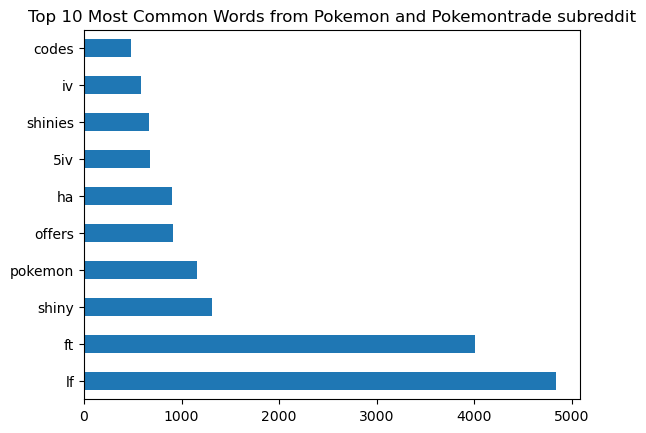

[CV] END tvec__max_features=2000, tvec__ngram_range=(1, 2), tvec__stop_words=english; total time=   0.4s
[CV] END tvec__max_features=3000, tvec__ngram_range=(1, 2), tvec__stop_words=None; total time=   0.5s
[CV] END tvec__max_features=3000, tvec__ngram_range=(1, 2), tvec__stop_words=None; total time=   0.5s
[CV] END tvec__max_features=2000, tvec__ngram_range=(1, 1), tvec__stop_words=english; total time=   0.2s
[CV] END tvec__max_features=3000, tvec__ngram_range=(1, 1), tvec__stop_words=None; total time=   0.2s
[CV] END tvec__max_features=3000, tvec__ngram_range=(1, 1), tvec__stop_words=english; total time=   0.2s
[CV] END tvec__max_features=4000, tvec__ngram_range=(1, 2), tvec__stop_words=english; total time=   0.5s
[CV] END tvec__max_features=4000, tvec__ngram_range=(1, 2), tvec__stop_words=english; total time=   0.4s
[CV] END tvec__max_features=2000, tvec__ngram_range=(1, 1), tvec__stop_words=english; total time=   0.2s
[CV] END tvec__max_features=3000, tvec__ngram_range=(1, 1), tvec

In [89]:
# Convert X_train into a DataFrame.
X_train_df = pd.DataFrame(X_train_df.todense(), columns=pipe.named_steps['cvec'].get_feature_names())

# plot top occuring words
X_train_df.sum().sort_values(ascending=False).head(10).plot(kind='barh')
plt.title('Top 10 Most Common Words from Pokemon and Pokemontrade subreddit');

In [41]:
# Search over the following values of hyperparameters:
# Maximum number of features fit: 2000, 3000, 4000, 5000
# Minimum number of documents needed to include token: 2, 3
# Maximum number of documents needed to include token: 90%, 95%
# Check (individual tokens) and also check (individual tokens and 2-grams).
pipe_params = {
    'cvec__max_features': [2000, 3000, 4000, 5000],
    'cvec__min_df': [2, 3],
    'cvec__max_df': [0.9, 0.95],
    'cvec__ngram_range': [(1,1), (1,2)]
}

In [42]:
# Instantiate GridSearchCV.
gs2 = GridSearchCV(
    estimator=pipe, # what object are we optimizing?
    param_grid=pipe_params, # what parameters values are we searching?
    cv=5, # 5-fold cross-validation.
    n_jobs=-1
)

In [43]:
# Fit GridSearch to training data.
gs2.fit(X_train, y_train);

In [44]:
gs2.score(X_train, y_train)

0.8912713883474117

In [45]:
gs2.score(X_test, y_test)

0.8854693339195427

In [46]:
# Get predictions
preds2 = gs2.predict(X_test)

# Save confusion matrix values
tn, fp, fn, tp = confusion_matrix(y_test, preds2).ravel()

In [47]:
 # Calculate the specificity (TRUE NEG RATE)
spec = tn/(tn + fp)
print('Specificity:', spec)

Specificity: 0.9632731958762887


In [48]:
precision = tp/(tp + fp)
print('Precision:', precision)

Precision: 0.977992277992278


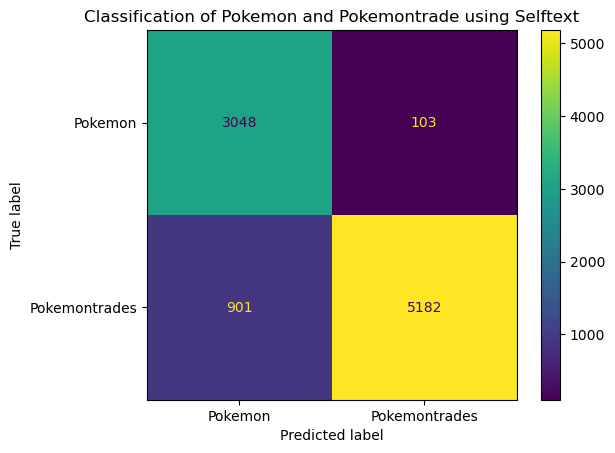

In [49]:
from sklearn.metrics import plot_confusion_matrix, ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(gs2, X_train, y_train, display_labels = ['Pokemon', 'Pokemontrades'])
plt.title('Classification of Pokemon and Pokemontrade using Selftext');

In [50]:
from sklearn.metrics import classification_report

print(classification_report(y_test, preds2, target_names=['Pokemon', 'Pokemontrades'], digits=3))

               precision    recall  f1-score   support

      Pokemon      0.763     0.963     0.852      1552
Pokemontrades      0.978     0.845     0.907      2997

     accuracy                          0.885      4549
    macro avg      0.871     0.904     0.879      4549
 weighted avg      0.905     0.885     0.888      4549



# CVEC + NB for Title

In [51]:
X = merge_df['title']
y = merge_df['subreddit']

In [52]:
# Split the data into the training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y,random_state=42)

In [53]:
# Let's set a pipeline up with two stages:
# 1. CountVectorizer (transformer)
# 2. Multinomial Naive Bayes (estimator)
pipe = Pipeline([
    ('cvec', CountVectorizer(stop_words='english')),
    ('nb', MultinomialNB())
])

In [54]:
# Fit the vectorizer on our corpus.
pipe.fit(X_train, y_train)

Pipeline(steps=[('cvec', CountVectorizer(stop_words='english')),
                ('nb', MultinomialNB())])

In [55]:
pipe.named_steps['cvec']

CountVectorizer(stop_words='english')

In [56]:
# Check out the vocabulary
pipe.named_steps['cvec'].vocabulary_

{'game': 1881,
 'suggestions': 4547,
 'experience': 1610,
 'ultra': 4910,
 'necrozma': 3119,
 'lf': 2632,
 'starters': 4471,
 'ivs': 2426,
 'ft': 1848,
 '5ivs': 133,
 'ask': 380,
 'll': 2690,
 'shiny': 4198,
 '5iv': 132,
 'bold': 574,
 'prankster': 3600,
 'klefki': 2519,
 'check': 818,
 'list': 2673,
 'xyoras': 5256,
 'milotic': 2957,
 'pokemon': 3521,
 'holding': 2233,
 'prism': 3636,
 'scale': 4072,
 'need': 3120,
 'home': 2236,
 'dex': 1242,
 'iv': 2422,
 'foongus': 1791,
 'amoongus': 277,
 'calm': 706,
 'nature': 3110,
 'inside': 2376,
 'moon': 3034,
 'stones': 4498,
 'single': 4237,
 'starter': 4470,
 'murkrow': 3076,
 'breedjects': 633,
 'dreams': 1363,
 'millions': 2956,
 'damage': 1132,
 'dead': 1161,
 'cap': 717,
 'really': 3787,
 '65535': 138,
 'want': 5098,
 'pokémon': 3546,
 'straightforward': 4509,
 'way': 5118,
 'non': 3174,
 'static': 4477,
 'alphas': 261,
 'black': 552,
 'champions': 786,
 'tournment': 4779,
 'regenerator': 3830,
 'mareanie': 2834,
 'toxapex': 4782,
 'h

In [57]:
X_train_df = pipe.named_steps['cvec'].transform(X_train) 

/Users/kamwingsze/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


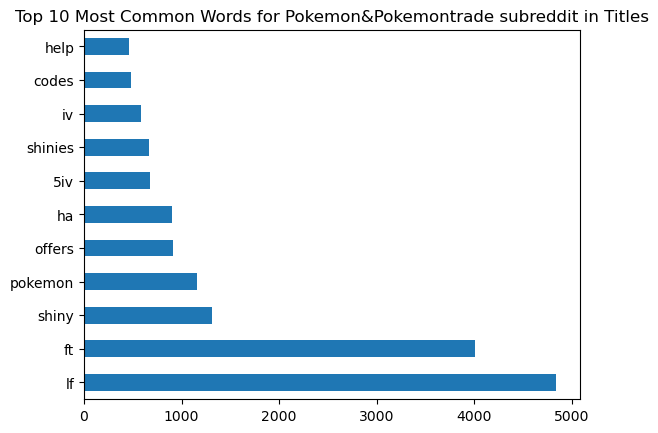

In [58]:
# Convert X_train into a DataFrame.
X_train_df = pd.DataFrame(X_train_df.todense(), columns=pipe.named_steps['cvec'].get_feature_names())

# plot top occuring words
X_train_df.sum().sort_values(ascending=False).head(11).plot(kind='barh')
plt.title('Top 10 Most Common Words for Pokemon&Pokemontrade subreddit in Titles');

In [59]:
# Search over the following values of hyperparameters:
# Maximum number of features fit: 2000, 3000, 4000, 5000
# Minimum number of documents needed to include token: 2, 3
# Maximum number of documents needed to include token: 90%, 95%
# Check (individual tokens) and also check (individual tokens and 2-grams).
pipe_params = {
    'cvec__max_features': [2000, 3000, 4000, 5000],
    'cvec__min_df': [2, 3],
    'cvec__max_df': [0.9, 0.95],
    'cvec__ngram_range': [(1,1), (1,2)]
}

In [60]:
# Instantiate GridSearchCV.
gs = GridSearchCV(
    estimator=pipe, # what object are we optimizing?
    param_grid=pipe_params, # what parameters values are we searching?
    cv=5, # 5-fold cross-validation.
    n_jobs=-1
)

In [61]:
# Fit GridSearch to training data.
gs.fit(X_train, y_train);

In [62]:
gs.score(X_train, y_train)

0.955382282867663

In [63]:
gs.score(X_test, y_test)

0.9406462958892065

In [64]:
# Get predictions
preds = gs.predict(X_test)

# Save confusion matrix values
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()

In [65]:
 # Calculate the specificity (TRUE NEG RATE)
spec = tn/(tn + fp)
print('Specificity:', spec)

Specificity: 0.8872422680412371


In [66]:
precision = tp/(tp + fp)
print('Precision:', precision)

Precision: 0.943126421839454


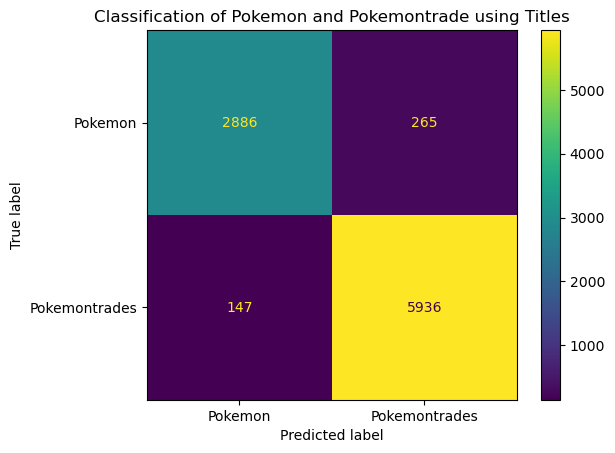

In [67]:
from sklearn.metrics import plot_confusion_matrix, ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(gs, X_train, y_train, display_labels = ['Pokemon', 'Pokemontrades'])
plt.title('Classification of Pokemon and Pokemontrade using Titles');

#  Using TfidfVectorizer and Title to do prediction

In [68]:
# Instantiate the transformer.
tvec = TfidfVectorizer(stop_words='english')

/Users/kamwingsze/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


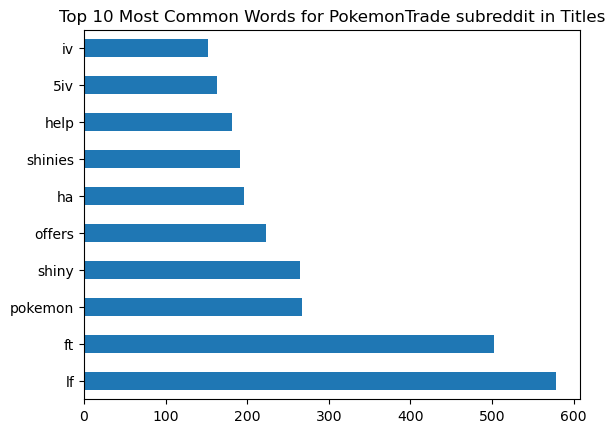

In [69]:
# convert training data to dataframe
X_train_df = pd.DataFrame(
    tvec.fit_transform(X_train).todense(),
    columns=tvec.get_feature_names()
)

# plot top occuring words
X_train_df.sum().sort_values(ascending=False).head(10).plot(kind='barh')
plt.title('Top 10 Most Common Words for PokemonTrade subreddit in Titles');

In [70]:
# Let's set a pipeline up with two stages:
# 1. tf-idf vectorizer (transformer)
# 2. Multinomial Naive Bayes (estimator)
pipe_tvec = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('nb', MultinomialNB())
])

In [71]:
# Search over the following values of hyperparameters:
# Maximum number of features fit: 2000, 3000, 4000, 5000
# No stop words and english stop words
# Check (individual tokens) and also check (individual tokens and 2-grams).
pipe_tvec_params = {
    'tvec__max_features': [2000, 3000, 4000, 5000],
    'tvec__stop_words': [None, 'english'],
    'tvec__ngram_range': [(1,1), (1,2)]
}

In [72]:
# Instantiate GridSearchCV.
gs_tvec = GridSearchCV(
    pipe_tvec,
    pipe_tvec_params,
    cv=5,
    n_jobs=-1,
    verbose=2
)

In [73]:
# Fit GridSearch to training data.
gs_tvec.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tvec', TfidfVectorizer()),
                                       ('nb', MultinomialNB())]),
             n_jobs=-1,
             param_grid={'tvec__max_features': [2000, 3000, 4000, 5000],
                         'tvec__ngram_range': [(1, 1), (1, 2)],
                         'tvec__stop_words': [None, 'english']},
             verbose=2)

In [74]:
# Best parameters
gs_tvec.best_params_

{'tvec__max_features': 5000,
 'tvec__ngram_range': (1, 2),
 'tvec__stop_words': None}

In [75]:
# Score model on training set.
gs_tvec.score(X_train, y_train)

0.9671864847303444

In [76]:
# Score model on testing set.
gs_tvec.score(X_test, y_test)

0.9536161793800836

In [77]:
# Get predictions
preds_tvec = gs_tvec.predict(X_test)

# Save confusion matrix values
tn, fp, fn, tp = confusion_matrix(y_test, preds_tvec).ravel()

In [78]:
 # Calculate the specificity (TRUE NEG RATE)
spec = tn/(tn + fp)
print('Specificity:', spec)

Specificity: 0.9233247422680413


In [79]:
precision = tp/(tp + fp)
print('Precision:', precision)

Precision: 0.9606481481481481


In [80]:
# Calculate the specificity and precision
print(classification_report(y_test, preds_tvec, target_names=['pokemon', 'pokemontrades']))

               precision    recall  f1-score   support

      pokemon       0.94      0.92      0.93      1552
pokemontrades       0.96      0.97      0.96      2997

     accuracy                           0.95      4549
    macro avg       0.95      0.95      0.95      4549
 weighted avg       0.95      0.95      0.95      4549



/Users/kamwingsze/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


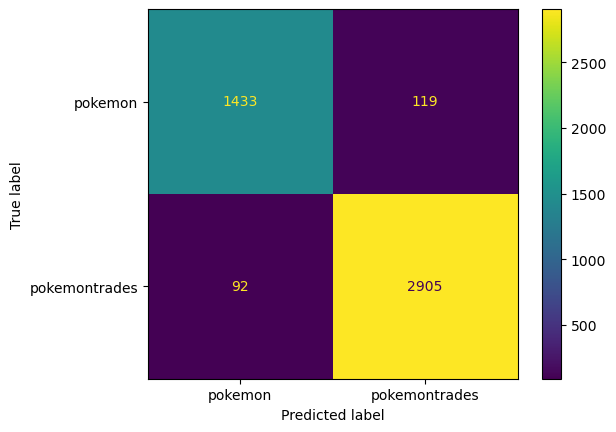

In [81]:
plot_confusion_matrix(gs_tvec, X_test, y_test, display_labels=['pokemon', 'pokemontrades']);

In [82]:
y_train == 0

862       True
1179      True
13513    False
12007    False
9413     False
         ...  
6609     False
10893    False
1822      True
10974    False
1180      True
Name: subreddit, Length: 9234, dtype: bool

/Users/kamwingsze/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


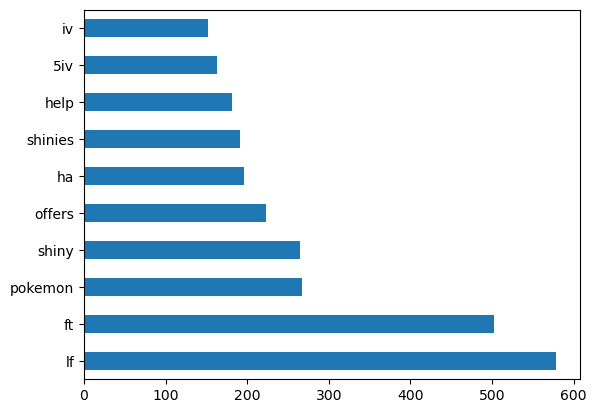

In [83]:
# convert training data to dataframe
X_train_df = pd.DataFrame(
    tvec.fit_transform(X_train).todense(),
    columns=tvec.get_feature_names()
)

# plot top occuring words
X_train_df.sum().sort_values(ascending=False).head(10).plot(kind='barh');

In [84]:
X_train_df[(y_train == 0).values]

,000,001,011,019,02,030719,04,041,05,0502,...,надежный,народов,наше,оплот,отечество,свободное,славься,ಠ益ರ,ღlf,クララ
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9217,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9220,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9221,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9231,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


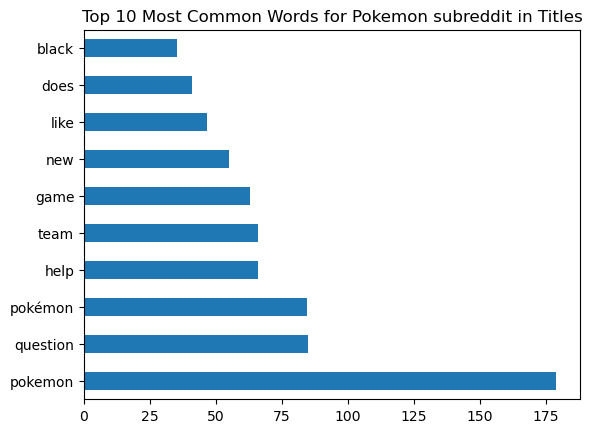

In [85]:
# plot top occuring words
X_train_df[(y_train == 0).values].sum().sort_values(ascending=False).head(10).plot(kind='barh')
plt.title('Top 10 Most Common Words for Pokemon subreddit in Titles');

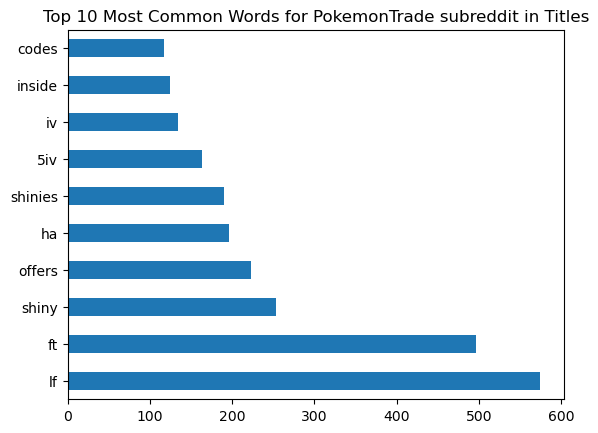

In [86]:
# plot top occuring words
X_train_df[(y_train == 1).values].sum().sort_values(ascending=False).head(10).plot(kind='barh')
plt.title('Top 10 Most Common Words for PokemonTrade subreddit in Titles');